In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [12]:
df = pd.read_csv("D:\\END_TO_END ML project\\notebook\\data\\StudentsPerformance.csv")

In [15]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [17]:
df.shape

(1000, 8)

In [18]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [19]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [21]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [22]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [23]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [28]:
print("Categories in 'gender' variable : ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable : ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable : ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable : ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable : ")
print(df['test preparation course'].unique())



Categories in 'gender' variable : 
['female' 'male']
Categories in 'race/ethnicity' variable : 
['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable : 
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable : 
['standard' 'free/reduced']
Categories in 'test preparation course' variable : 
['none' 'completed']


In [31]:
# for dependent features , total score and avg, score is caculated
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['avg_score'] = df['total_score']/ 3
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [42]:
reading_full = df[df['reading score'] == 100]['reading score'].count()
writing_full =  df[df['writing score'] == 100]['writing score'].count()

maths_full = df[df['math score'] == 100]['math score'].count()

print(f'No. of students with full marks in maths: {maths_full}')
print(f'No. of students with full marks in maths: {writing_full}')
print(f'No. of students with full marks in maths: {reading_full}')

No. of students with full marks in maths: 7
No. of students with full marks in maths: 14
No. of students with full marks in maths: 17


In [43]:
reading_less = df[df['reading score'] <= 20]['reading score'].count()
writing_less =  df[df['writing score'] <= 20]['writing score'].count()

maths_less = df[df['math score'] <= 20]['math score'].count()

print(f'No. of students with less marks in maths: {maths_less}')
print(f'No. of students with full marks in maths: {writing_less}')
print(f'No. of students with full marks in maths: {reading_less}')

No. of students with less marks in maths: 4
No. of students with full marks in maths: 3
No. of students with full marks in maths: 1


Insights:
- Worst performance of students is in maths
- Best performance of students is in reading

## EDA ##

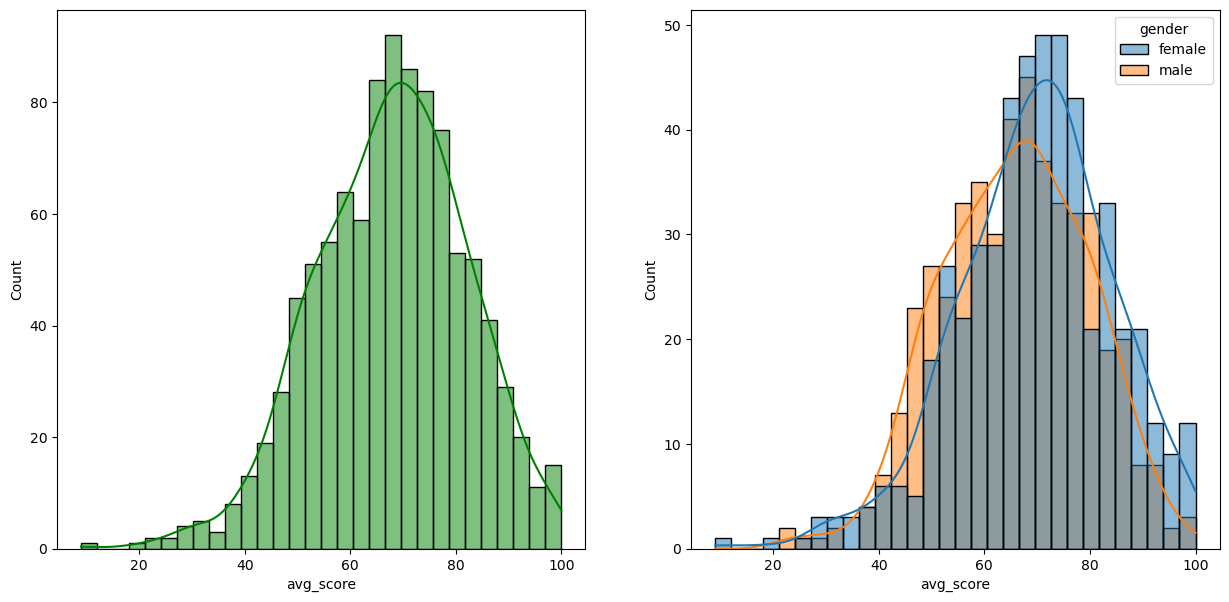

In [48]:
# Histogram
fig,axs= plt.subplots(1,2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df,x = 'avg_score', bins= 30, kde= True, color= 'g')
plt.subplot(122)
sns.histplot(data = df,x = 'avg_score', bins= 30, kde= True, color= 'g', hue= 'gender')
plt.show()

## Insights ##
- Females performs better than males in terms of both total and average scores.

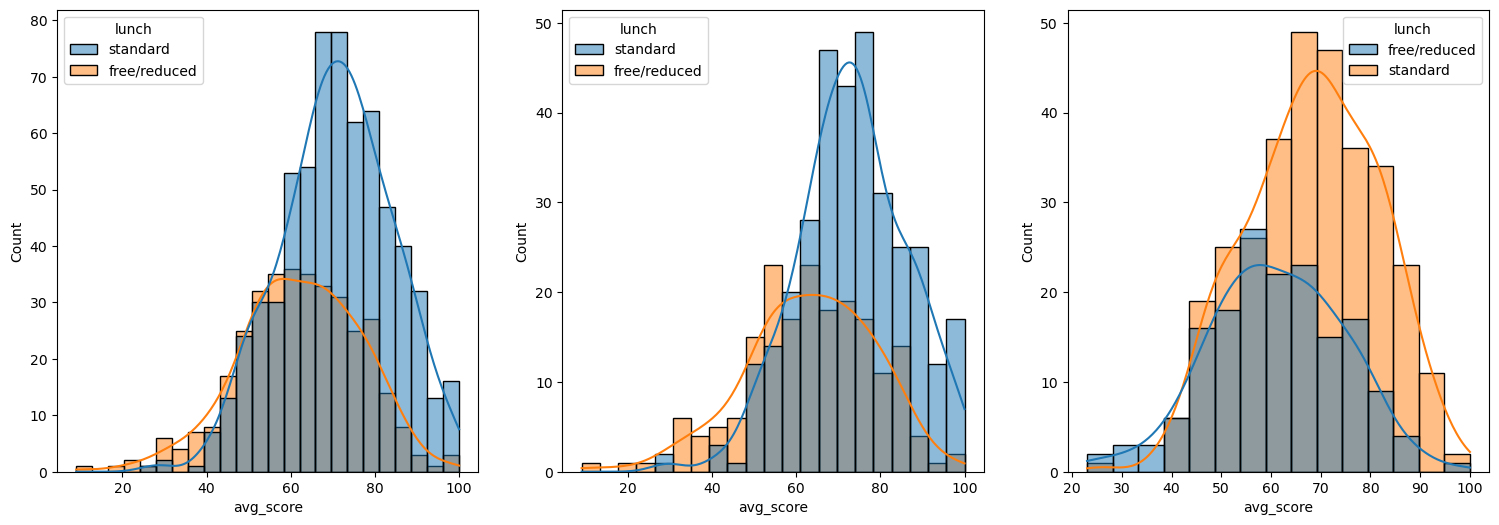

In [50]:
fig,axs = plt.subplots(1,3, figsize = (25,6))
plt.subplot(141)
sns.histplot(data= df, x = 'avg_score', hue = 'lunch', kde = True)
plt.subplot(142)
sns.histplot(data= df[df.gender == 'female'], x = 'avg_score', hue = 'lunch', kde = True)
plt.subplot(143)
sns.histplot(data= df[df.gender == 'male'], x = 'avg_score', hue = 'lunch', kde = True)
plt.show()

# Insights #
- Standard lunch helps perform well in exams
- Standard lunch helps perform well in exams be it male or female